In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

pd.options.display.max_rows = 4000

In [290]:
df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [291]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [293]:
### drop id column

df = df.drop(labels=["Id"], axis=1)

# Handle missing values

In [294]:
## we need to handle the yr columns
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[feature]=df['YrSold']-df[feature]

In [295]:
df.head(50)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,69,58,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,69.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,

In [296]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [297]:
### remove columns with high amout of missing values categorical data

columns_to_be_dropped = [feature for feature in df.columns if df[feature].isnull().sum() > 500]

columns_to_be_dropped

# for feature in df[categorical_features]:
#     if df[feature].isnull().sum() > 500:
#         df[categorical_features] = df[categorical_features].drop(labels=[feature], axis = 1)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [298]:
df = df.drop(labels=columns_to_be_dropped, axis = 1)

In [299]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [300]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [301]:
### Seperate Numerical and Categorical values

numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]

categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [302]:
cat_features_wt_nan = [feature for feature in categorical_features if df[feature].isnull().sum()>0]

cat_features_wt_nan

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [303]:
for feature in cat_features_wt_nan:
    mode_val = df[feature].mode()
    df[feature] = df[feature].fillna(mode_val[0])

In [304]:
##Fill the remaining small missing values in categories columns with new lable called Missing

# df[categorical_features] = df[categorical_features].fillna("Missing")

In [305]:
df[categorical_features].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [306]:
df[numeric_features].isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

LotFrontage


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


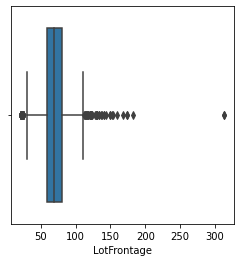

GarageYrBlt


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


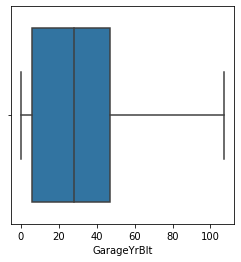

MasVnrArea


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


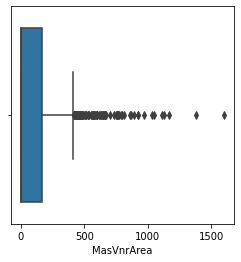

In [307]:
missing_values = ["LotFrontage", "GarageYrBlt", "MasVnrArea"]
for feature in missing_values:
    print(feature)
    plt.figure(figsize=(4,4))
    sns.boxplot(df[feature])
    plt.show()

In [308]:
### removing the outliers
data_1 = df[df["LotFrontage"]<100]
LotFrontage_data = data_1[data_1["LotFrontage"]>50]

# GarageYrBlt_data = df[df["GarageYrBlt"]<100]

MasVnrArea_data = df[df["MasVnrArea"]<400]

In [309]:
### Fill the remaining small missing values in numeric columns with mean
df["LotFrontage"] = df["LotFrontage"].fillna(np.mean(LotFrontage_data["LotFrontage"]))

df["GarageYrBlt"] = df["GarageYrBlt"].fillna(np.mean(df["GarageYrBlt"]))

df["MasVnrArea"] = df["MasVnrArea"].fillna(np.mean(MasVnrArea_data["MasVnrArea"]))

In [310]:
df[numeric_features].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Handling Outliers

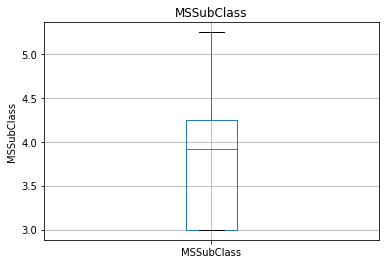

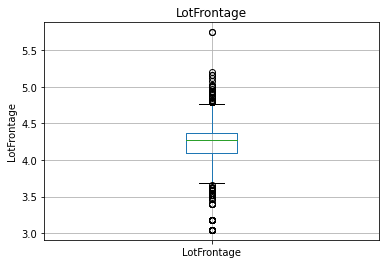

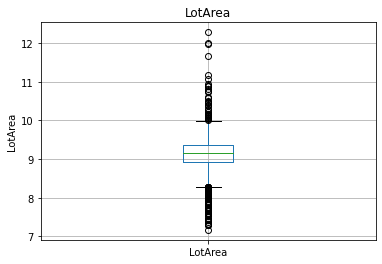

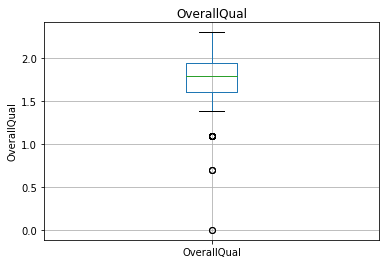

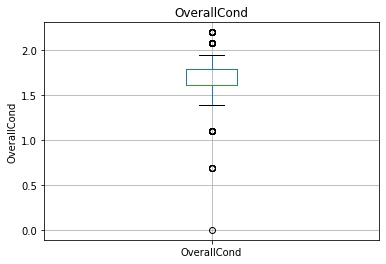

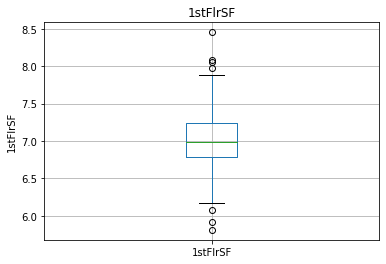

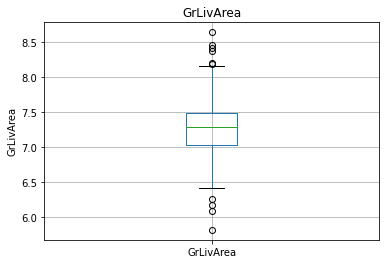

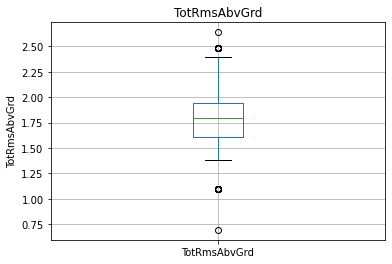

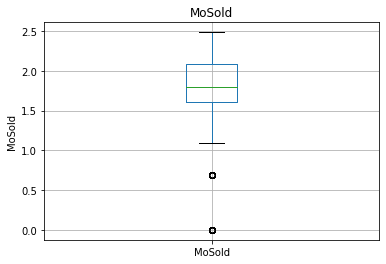

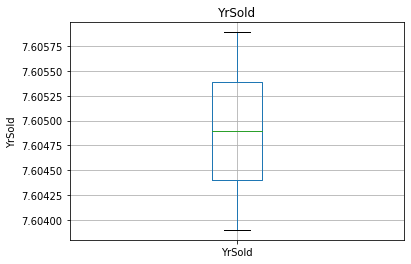

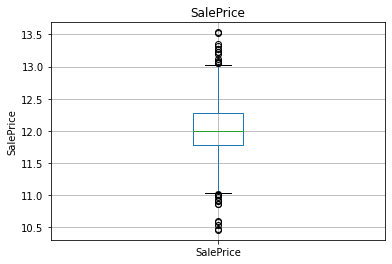

In [311]:
for feature in numeric_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [312]:
### some data seems normally distributed and others seems skewed data 

### 1. for normally distributed data we apply three percentile method

### 2. for skewed data we use IQR method


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


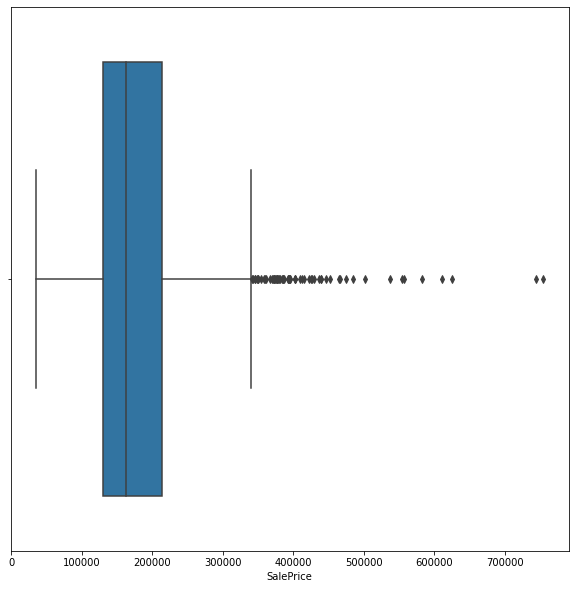

In [313]:
plt.figure(figsize=(10,10))
sns.boxplot(df["SalePrice"])
plt.show()

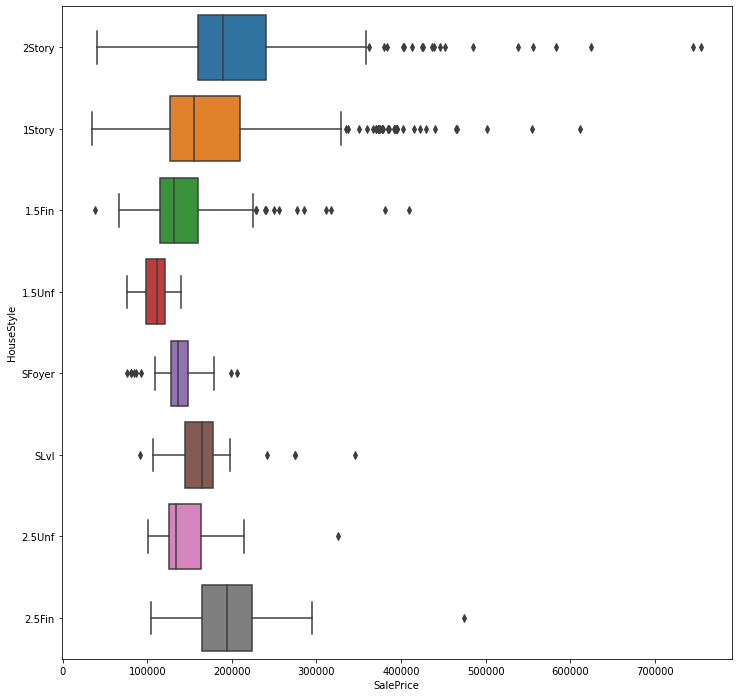

In [314]:
### we need to check all price related columns which means  change y value like, HouseStyle, year build, LandContour
plt.figure(figsize=(12,12))
sns.boxplot(data=df, x="SalePrice", y="HouseStyle")
plt.show()

### all gives the maximum values is 350000 so we drop price rows which have more than 350000

In [315]:
df.shape

(1460, 75)

In [316]:
data = df[df['SalePrice']>350000].index

In [317]:
len(data)

54

In [318]:
data

Int64Index([  53,   58,  112,  151,  161,  178,  185,  224,  231,  278,  309,
             313,  321,  336,  349,  378,  389,  440,  473,  477,  481,  496,
             515,  527,  585,  591,  608,  644,  661,  664,  678,  688,  691,
             702,  769,  774,  798,  803,  825,  898,  987, 1046, 1142, 1169,
            1181, 1182, 1228, 1243, 1267, 1268, 1353, 1373, 1388, 1437],
           dtype='int64')

In [319]:
df = df.drop(data)

In [320]:
df.shape

(1406, 75)

In [321]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Handle Skewness

In [322]:
from scipy.stats import skew

In [323]:
for feature in df[numeric_features]:
    print(f"{feature} : {skew(df[feature])}")

MSSubClass : 1.3852113447567347
LotFrontage : 2.474172825584684
LotArea : 11.176551530196697
OverallQual : 0.05898183050093761
OverallCond : 0.6564896081971401
YearBuilt : 0.5740571352633224
YearRemodAdd : 0.4531746443240282
MasVnrArea : 2.7283793547760022
BsmtFinSF1 : 1.8426008810085701
BsmtFinSF2 : 4.227258322478447
BsmtUnfSF : 0.8173927362272942
TotalBsmtSF : 1.6088186520401426
1stFlrSF : 1.4250080410604027
2ndFlrSF : 0.7401734680234638
LowQualFinSF : 9.015924639145554
GrLivArea : 1.2367087880865184
BsmtFullBath : 0.6357694279470809
BsmtHalfBath : 4.073274900631257
FullBath : 0.014989335093385684
HalfBath : 0.7294490069236241
BedroomAbvGr : 0.27415627046844676
KitchenAbvGr : 4.387856149928653
TotRmsAbvGrd : 0.6416048286054857
Fireplaces : 0.6806038244634447
GarageYrBlt : 0.6277364174296105
GarageCars : -0.3805098923410082
GarageArea : 0.11720288363674812
WoodDeckSF : 1.5234871596577884
OpenPorchSF : 2.4585447556003603
EnclosedPorch : 3.042259831548127
3SsnPorch : 10.726203251933628


MSSubClass : 1.3852113447567347


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


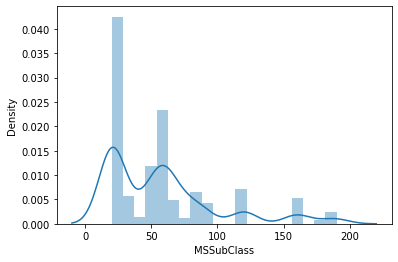

LotFrontage : 2.474172825584684


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


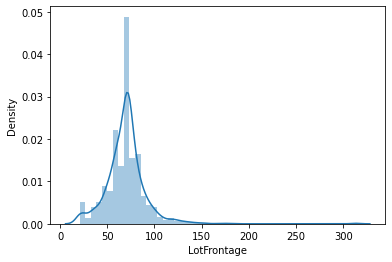

LotArea : 11.176551530196697


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


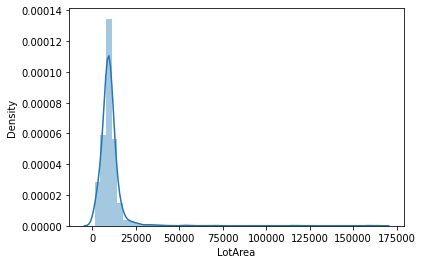

OverallQual : 0.05898183050093761


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


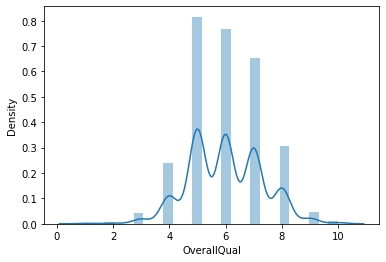

OverallCond : 0.6564896081971401


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


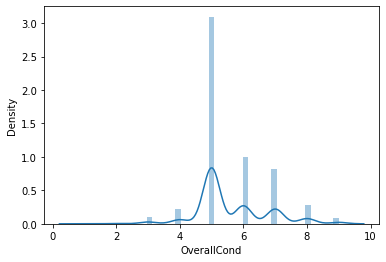

YearBuilt : 0.5740571352633224


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


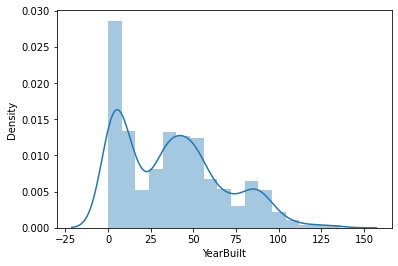

YearRemodAdd : 0.4531746443240282


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


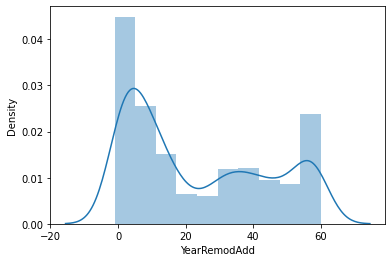

MasVnrArea : 2.7283793547760022


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


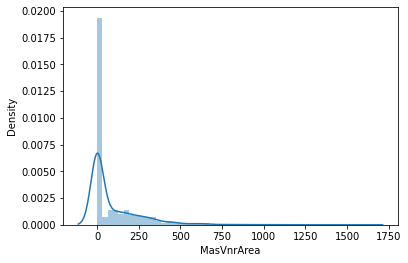

BsmtFinSF1 : 1.8426008810085701


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


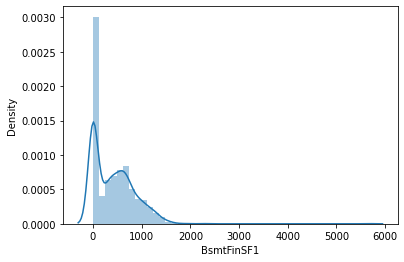

BsmtFinSF2 : 4.227258322478447


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


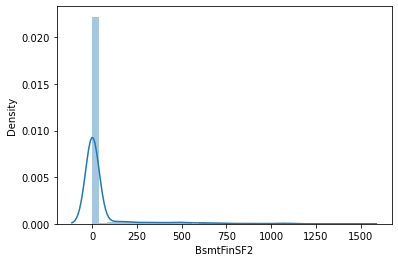

BsmtUnfSF : 0.8173927362272942


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


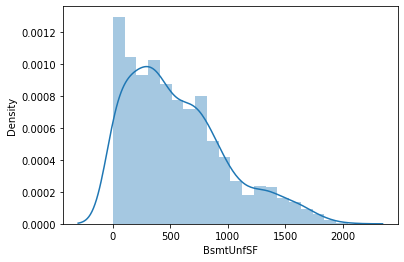

TotalBsmtSF : 1.6088186520401426


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


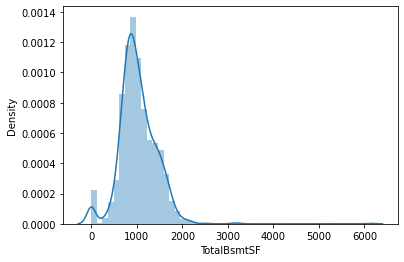

1stFlrSF : 1.4250080410604027


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


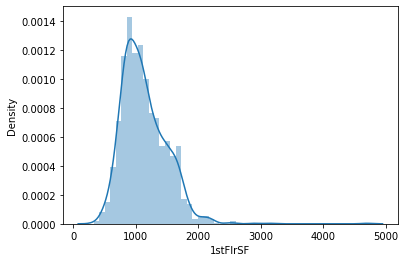

2ndFlrSF : 0.7401734680234638


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


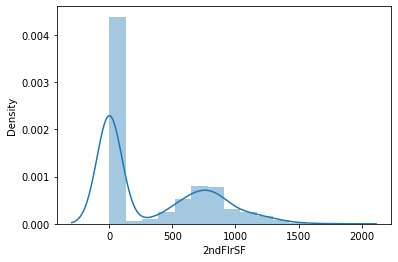

LowQualFinSF : 9.015924639145554


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


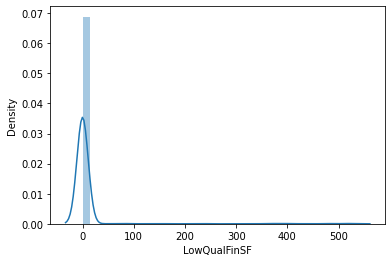

GrLivArea : 1.2367087880865184


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


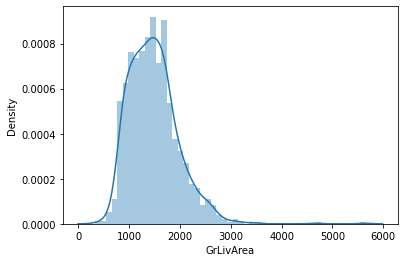

BsmtFullBath : 0.6357694279470809


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


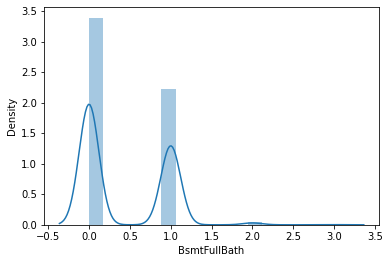

/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


BsmtHalfBath : 4.073274900631257


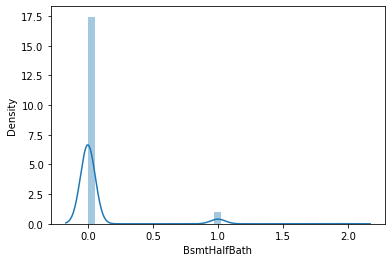

FullBath : 0.014989335093385684


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


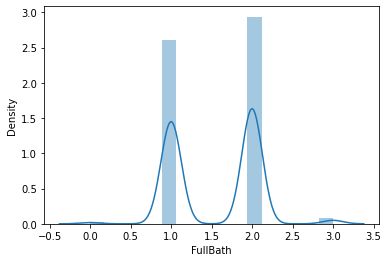

HalfBath : 0.7294490069236241


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


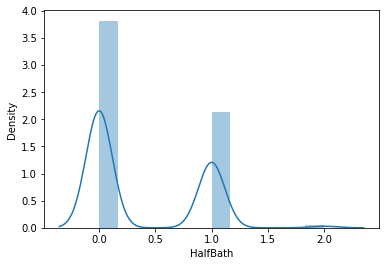

BedroomAbvGr : 0.27415627046844676


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


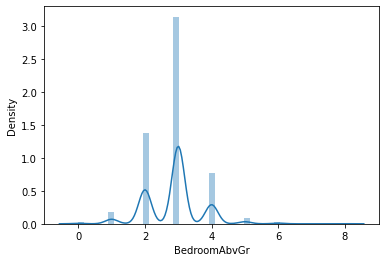

KitchenAbvGr : 4.387856149928653


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


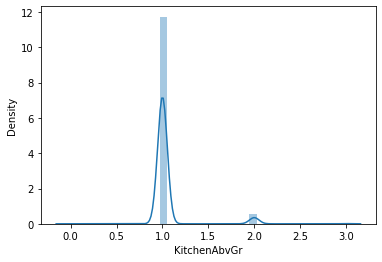

TotRmsAbvGrd : 0.6416048286054857


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


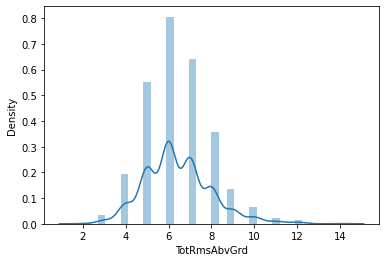

Fireplaces : 0.6806038244634447


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


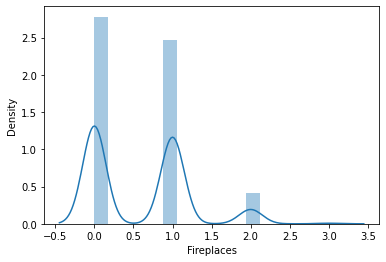

/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


GarageYrBlt : 0.6277364174296105


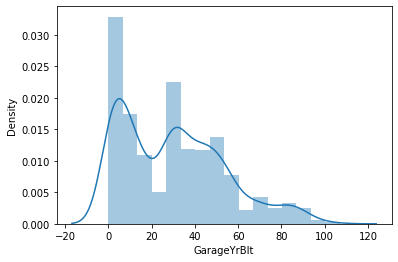

GarageCars : -0.3805098923410082


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


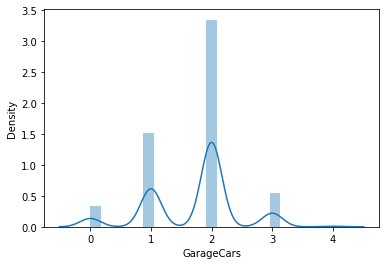

GarageArea : 0.11720288363674812


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


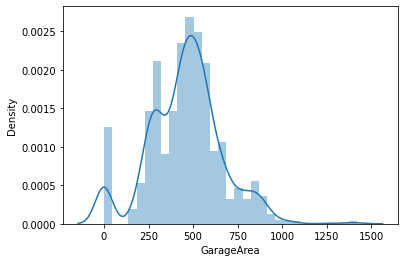

WoodDeckSF : 1.5234871596577884


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


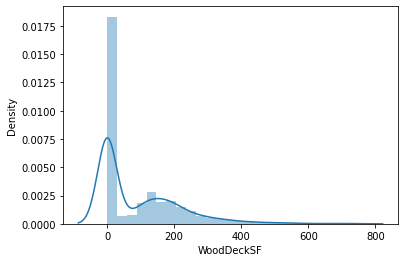

OpenPorchSF : 2.4585447556003603


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


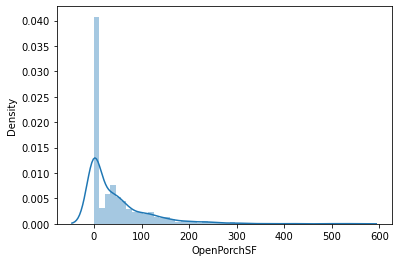

EnclosedPorch : 3.042259831548127


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


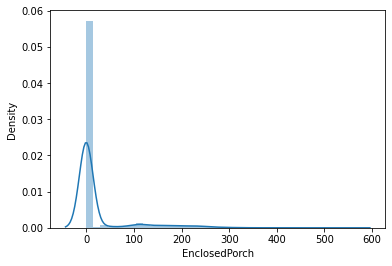

3SsnPorch : 10.726203251933628


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


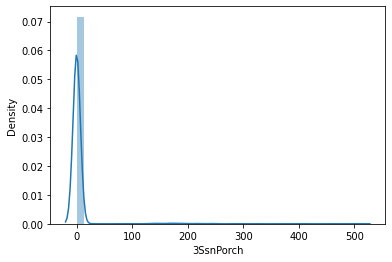

ScreenPorch : 4.1696122230453305


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


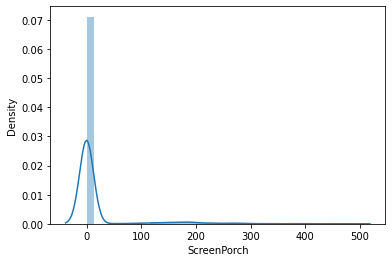

PoolArea : 15.77540012433013


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


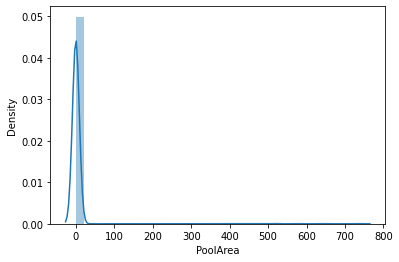

MiscVal : 23.995932738379846


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


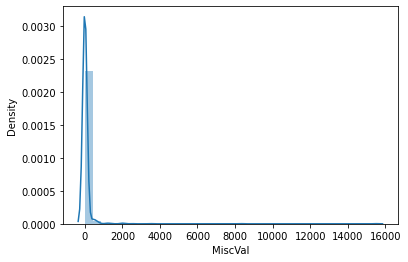

MoSold : 0.2264653623884214


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


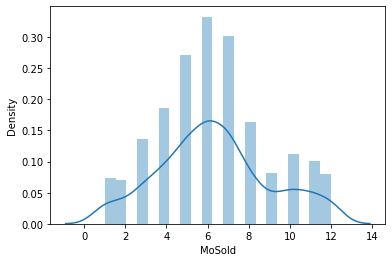

YrSold : 0.09357195764343443


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


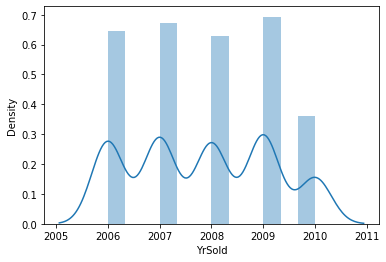

SalePrice : 0.7178127585252648


/home/kalaiselvan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


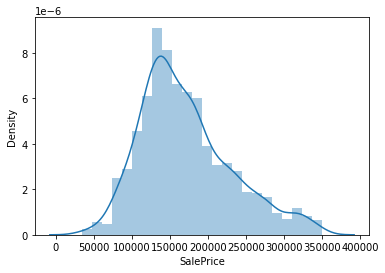

In [324]:
for feature in df[numeric_features]:
    print(f"{feature} : {skew(df[feature])}")
    
    plt.figure()
    sns.distplot(df[feature])
    plt.show()

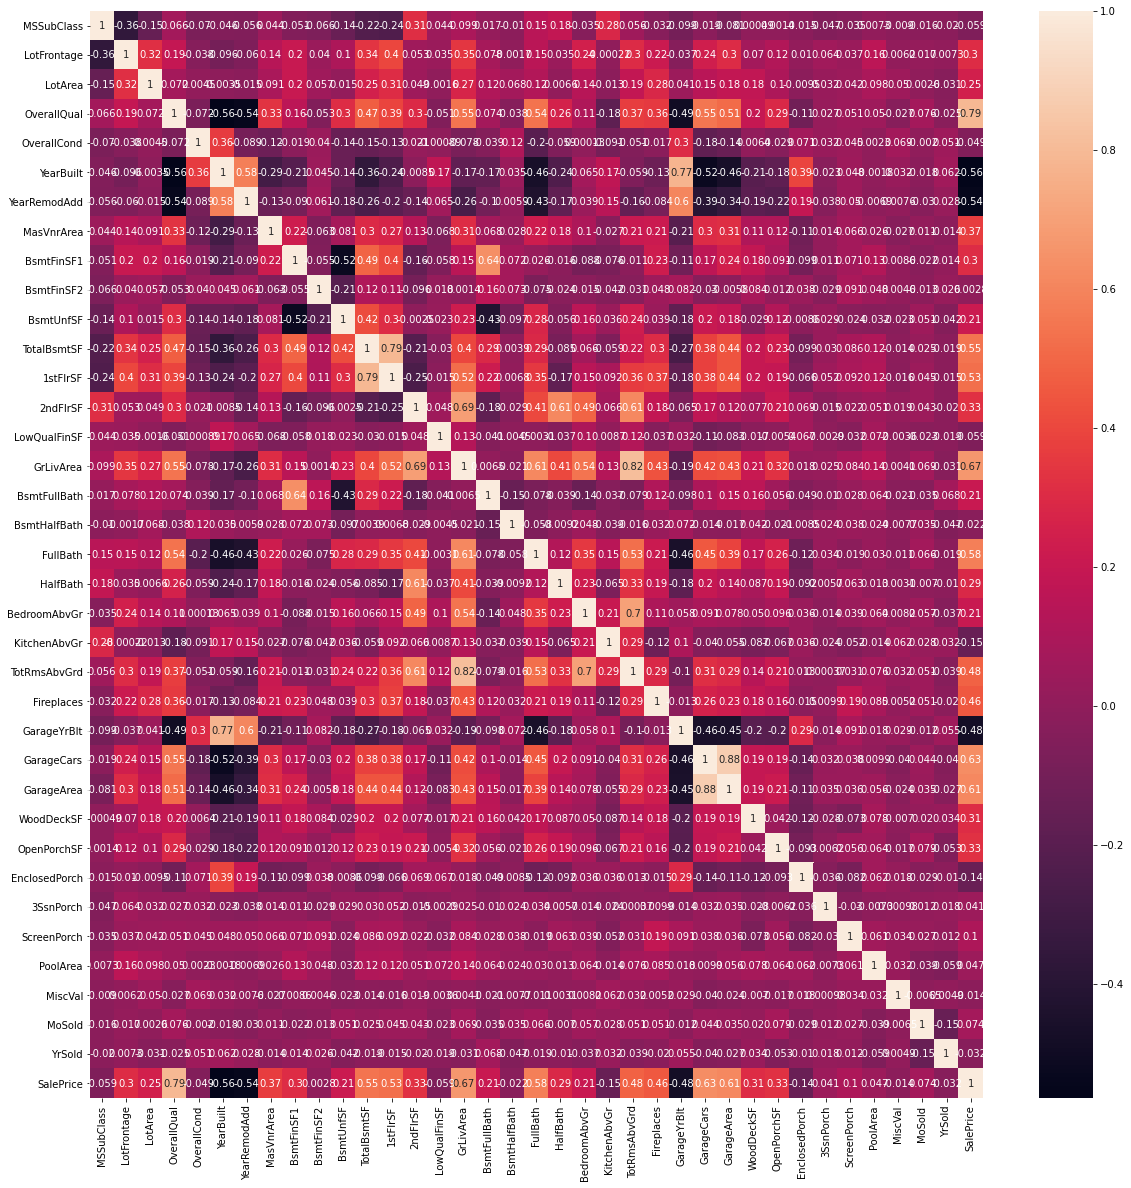

In [325]:
### Need to check the co-relation before apply log or sqrt for hign skewed features

cor_matrix = df[numeric_features].corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor_matrix,annot=True)
plt.show()

In [326]:
corr_pairs = cor_matrix.unstack()

corr_pairs

MSSubClass     MSSubClass       1.000000
               LotFrontage     -0.361468
               LotArea         -0.149436
               OverallQual      0.066349
               OverallCond     -0.070182
               YearBuilt       -0.046024
               YearRemodAdd    -0.056352
               MasVnrArea       0.044060
               BsmtFinSF1      -0.050753
               BsmtFinSF2      -0.066037
               BsmtUnfSF       -0.137430
               TotalBsmtSF     -0.224325
               1stFlrSF        -0.240076
               2ndFlrSF         0.311722
               LowQualFinSF     0.043947
               GrLivArea        0.098973
               BsmtFullBath     0.017252
               BsmtHalfBath    -0.010315
               FullBath         0.147774
               HalfBath         0.181668
               BedroomAbvGr    -0.034655
               KitchenAbvGr     0.281583
               TotRmsAbvGrd     0.056328
               Fireplaces      -0.031893
               G

In [327]:
#sor other features with saleproce 
sorted_pairs = corr_pairs.SalePrice
sorted_pairs

MSSubClass      -0.058979
LotFrontage      0.303587
LotArea          0.246926
OverallQual      0.786782
OverallCond     -0.049012
YearBuilt       -0.564251
YearRemodAdd    -0.542063
MasVnrArea       0.365588
BsmtFinSF1       0.303796
BsmtFinSF2       0.002779
BsmtUnfSF        0.213847
TotalBsmtSF      0.546806
1stFlrSF         0.525214
2ndFlrSF         0.326451
LowQualFinSF    -0.058591
GrLivArea        0.668598
BsmtFullBath     0.209889
BsmtHalfBath    -0.021942
FullBath         0.581281
HalfBath         0.285982
BedroomAbvGr     0.206744
KitchenAbvGr    -0.147365
TotRmsAbvGrd     0.481137
Fireplaces       0.455876
GarageYrBlt     -0.480777
GarageCars       0.633250
GarageArea       0.613226
WoodDeckSF       0.306803
OpenPorchSF      0.325439
EnclosedPorch   -0.139592
3SsnPorch        0.040766
ScreenPorch      0.102655
PoolArea         0.046710
MiscVal         -0.013894
MoSold           0.074079
YrSold          -0.031760
SalePrice        1.000000
dtype: float64

None of these features have high corelated with saleprice so we can apply log tranformation for all features except features have -ve values because log of -ve values give nan only so avoid features have negative values.

In [328]:
non_negative_pairs = sorted_pairs[sorted_pairs > 0]

non_negative_pairs  ###apply log transform for this columns

LotFrontage     0.303587
LotArea         0.246926
OverallQual     0.786782
MasVnrArea      0.365588
BsmtFinSF1      0.303796
BsmtFinSF2      0.002779
BsmtUnfSF       0.213847
TotalBsmtSF     0.546806
1stFlrSF        0.525214
2ndFlrSF        0.326451
GrLivArea       0.668598
BsmtFullBath    0.209889
FullBath        0.581281
HalfBath        0.285982
BedroomAbvGr    0.206744
TotRmsAbvGrd    0.481137
Fireplaces      0.455876
GarageCars      0.633250
GarageArea      0.613226
WoodDeckSF      0.306803
OpenPorchSF     0.325439
3SsnPorch       0.040766
ScreenPorch     0.102655
PoolArea        0.046710
MoSold          0.074079
SalePrice       1.000000
dtype: float64

log(0) and log(-ve) values gives un defined values so avoid features with ) an -ve values

In [329]:
###avoid features have less skew values like OverallQual
non_negative_features = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
                        "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath",
                        "FullBath", "HalfBath", "BedroomAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars",
                        "GarageArea", "WoodDeckSF", "OpenPorchSF", "3SsnPorch", "ScreenPorch", "PoolArea",
                        "MoSold"]

for feature in non_negative_features:
    if 0 in df[feature].unique():
        pass
    else:
        print(feature)
        df[feature] = np.log(df[feature])

LotFrontage
LotArea
1stFlrSF
GrLivArea
TotRmsAbvGrd
MoSold


In [330]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,2.079442,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0.693147,2008,WD,Normal,208500
1,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,1.791759,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,1.609438,2007,WD,Normal,181500
2,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,1.791759,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,2.197225,2008,WD,Normal,223500
3,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,1.945910,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0.693147,2006,WD,Abnorml,140000
4,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,2.197225,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,2.484907,2008,WD,Normal,250000


In [331]:
df[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


# Handle categorical data

In [332]:
### get the unique values of features to select the method
for feature in df[categorical_features]:
    print(f"{feature} : {len(df[feature].unique())}")

MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
SaleType : 9
SaleCondition : 6


In [333]:
### get ordinal category features for label encoding
label_features = ["ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                  "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "Functional", "GarageType", 
                  "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "LotShape", "LandContour", 
                  "Utilities", "LandSlope", "RoofMatl", "Exterior1st", "Exterior2nd", "Heating", "SaleCondition", 
                  "Electrical"]

In [334]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in label_features:
    df[feature] = le.fit_transform(df[feature])

In [335]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,3,3,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,1,12,13,BrkFace,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,6.752270,854,0,7.444249,1,0,2,1,3,1,2,2.079442,6,0,1,5.0,1,2,548,4,4,2,0,61,0,0,0,0,0,0.693147,2008,WD,4,208500
1,20,RL,4.382027,9.169518,Pave,3,3,0,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,1,8,8,None,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,7.140453,0,0,7.140453,0,1,2,0,3,1,3,1.791759,6,1,1,31.0,1,2,460,4,4,2,298,0,0,0,0,0,0,1.609438,2007,WD,4,181500
2,60,RL,4.219508,9.328123,Pave,0,3,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,1,12,13,BrkFace,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,6.824374,866,0,7.487734,1,0,2,1,3,1,2,1.791759,6,1,1,7.0,1,2,608,4,4,2,0,42,0,0,0,0,0,2.197225,2008,WD,4,223500
3,70,RL,4.094345,9.164296,Pave,0,3,0,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,1,13,15,None,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,6.867974,756,0,7.448334,1,0,1,0,3,1,2,1.945910,6,1,5,8.0,2,3,642,4,4,2,0,35,272,0,0,0,0,0.693147,2006,WD,0,140000
4,60,RL,4.430817,9.565214,Pave,0,3,0,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,1,12,13,BrkFace,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,2.197225,6,1,1,8.0,1,3,836,4,4,2,192,84,0,0,0,0,0,2.484907,2008,WD,4,250000


In [336]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

nominal_categories = categorical_features

In [337]:
### apply one-hot encoding for remaining nominal categorical features
for feature in nominal_categories:
    df[feature] = pd.get_dummies(df[feature])

In [338]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,4.174387,9.041922,0,3,3,0,0,0,0,0,0,1,0,7,5,5,5,0,1,12,13,0,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,6.752270,854,0,7.444249,1,0,2,1,3,1,2,2.079442,6,0,1,5.0,1,2,548,4,4,2,0,61,0,0,0,0,0,0.693147,2008,0,4,208500
1,20,0,4.382027,9.169518,0,3,3,0,0,0,0,0,0,1,0,6,8,31,31,0,1,8,8,0,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,7.140453,0,0,7.140453,0,1,2,0,3,1,3,1.791759,6,1,1,31.0,1,2,460,4,4,2,298,0,0,0,0,0,0,1.609438,2007,0,4,181500
2,60,0,4.219508,9.328123,0,0,3,0,0,0,0,0,0,1,0,7,5,7,6,0,1,12,13,0,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,6.824374,866,0,7.487734,1,0,2,1,3,1,2,1.791759,6,1,1,7.0,1,2,608,4,4,2,0,42,0,0,0,0,0,2.197225,2008,0,4,223500
3,70,0,4.094345,9.164296,0,0,3,0,1,0,0,0,0,1,0,7,5,91,36,0,1,13,15,0,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,6.867974,756,0,7.448334,1,0,1,0,3,1,2,1.945910,6,1,5,8.0,2,3,642,4,4,2,0,35,272,0,0,0,0,0.693147,2006,0,0,140000
4,60,0,4.430817,9.565214,0,0,3,0,0,0,0,0,0,1,0,8,5,8,8,0,1,12,13,0,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,2.197225,6,1,1,8.0,1,3,836,4,4,2,192,84,0,0,0,0,0,2.484907,2008,0,4,250000


In [339]:
new_saleprice = df["SalePrice"]

new_saleprice.to_csv("salesprice.csv", index=False)
new_saleprice.shape, type(new_saleprice)

((1406,), pandas.core.series.Series)

# Standard Scaler

In [340]:
df = df.drop(labels=["SalePrice"], axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,4.174387,9.041922,0,3,3,0,0,0,0,0,0,1,0,7,5,5,5,0,1,12,13,0,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,6.752270,854,0,7.444249,1,0,2,1,3,1,2,2.079442,6,0,1,5.0,1,2,548,4,4,2,0,61,0,0,0,0,0,0.693147,2008,0,4
1,20,0,4.382027,9.169518,0,3,3,0,0,0,0,0,0,1,0,6,8,31,31,0,1,8,8,0,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,7.140453,0,0,7.140453,0,1,2,0,3,1,3,1.791759,6,1,1,31.0,1,2,460,4,4,2,298,0,0,0,0,0,0,1.609438,2007,0,4
2,60,0,4.219508,9.328123,0,0,3,0,0,0,0,0,0,1,0,7,5,7,6,0,1,12,13,0,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,6.824374,866,0,7.487734,1,0,2,1,3,1,2,1.791759,6,1,1,7.0,1,2,608,4,4,2,0,42,0,0,0,0,0,2.197225,2008,0,4
3,70,0,4.094345,9.164296,0,0,3,0,1,0,0,0,0,1,0,7,5,91,36,0,1,13,15,0,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,6.867974,756,0,7.448334,1,0,1,0,3,1,2,1.945910,6,1,5,8.0,2,3,642,4,4,2,0,35,272,0,0,0,0,0.693147,2006,0,0
4,60,0,4.430817,9.565214,0,0,3,0,0,0,0,0,0,1,0,8,5,8,8,0,1,12,13,0,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,2.197225,6,1,1,8.0,1,3,836,4,4,2,192,84,0,0,0,0,0,2.484907,2008,0,4


In [341]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df)
print(data)

[[ 0.05888411 -0.08463642 -0.06709242 ...  0.1371672  -0.17761772
   0.23123199]
 [-0.87793128 -0.08463642  0.58426278 ... -0.61618076 -0.17761772
   0.23123199]
 [ 0.05888411 -0.08463642  0.07444832 ...  0.1371672  -0.17761772
   0.23123199]
 ...
 [ 0.29308796 -0.08463642 -0.01919906 ...  1.64386311 -0.17761772
   0.23123199]
 [-0.87793128 -0.08463642  0.07444832 ...  1.64386311 -0.17761772
   0.23123199]
 [-0.87793128 -0.08463642  0.38180839 ...  0.1371672  -0.17761772
   0.23123199]]


In [342]:
new_df = pd.DataFrame(data, columns=df.columns)

new_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.058884,-0.084636,-0.067092,-0.096748,-0.065465,0.737488,0.307694,-0.026679,-0.471814,-0.222433,-0.11063,-0.185968,-0.037743,0.451406,-0.348155,0.779180,-0.528829,-1.085404,-0.905530,-0.096604,-0.12001,0.748544,0.758161,-0.103844,0.650813,-0.984690,0.368414,0.857561,-0.445604,0.282628,0.600433,-0.431988,0.662072,0.311317,-0.291226,-0.953285,-0.418439,-0.123507,-0.910645,0.269191,0.308698,-0.773280,1.217737,-0.120064,0.611817,1.140997,-0.242659,0.845528,1.252467,0.167576,-0.215661,-0.529888,1.018661,0.260024,-0.924065,-0.692350,-1.053835,-0.330339,0.382043,0.426435,0.218439,0.189684,0.295734,-0.739839,0.242551,-0.364476,-0.112894,-0.26666,-0.064695,-0.089369,-1.912234,0.137167,-0.177618,0.231232
1,-0.877931,-0.084636,0.584263,0.155562,-0.065465,0.737488,0.307694,-0.026679,-0.471814,-0.222433,-0.11063,-0.185968,-0.037743,0.451406,-0.348155,0.003860,2.158640,-0.219960,0.354800,-0.096604,-0.12001,-0.504376,-0.656724,-0.103844,-0.569404,0.665458,0.368414,-0.520417,-0.445604,0.282628,-1.184363,-1.510807,1.293069,0.311317,-0.291226,-0.640889,0.576491,-0.123507,-0.910645,0.269191,0.308698,0.503767,-0.801938,-0.120064,-0.336282,-0.801184,3.918052,0.845528,-0.744096,0.167576,-0.215661,0.791074,-0.164385,0.260024,0.650766,-0.692350,0.033468,-0.330339,0.382043,-0.002318,0.218439,0.189684,0.295734,1.706642,-0.685889,-0.364476,-0.112894,-0.26666,-0.064695,-0.089369,-0.214011,-0.616181,-0.177618,0.231232
2,0.058884,-0.084636,0.074448,0.469189,-0.065465,-1.398998,0.307694,-0.026679,-0.471814,-0.222433,-0.11063,-0.185968,-0.037743,0.451406,-0.348155,0.779180,-0.528829,-1.018831,-0.857056,-0.096604,-0.12001,0.748544,0.758161,-0.103844,0.439143,-0.984690,0.368414,0.857561,-0.445604,0.282628,-0.291965,-0.431988,0.151707,0.311317,-0.291226,-0.291192,-0.261602,-0.123507,-0.910645,0.269191,0.308698,-0.536074,1.246116,-0.120064,0.747527,1.140997,-0.242659,0.845528,1.252467,0.167576,-0.215661,-0.529888,-0.164385,0.260024,0.650766,-0.692350,-0.970196,-0.330339,0.382043,0.718767,0.218439,0.189684,0.295734,-0.739839,-0.046635,-0.364476,-0.112894,-0.26666,-0.064695,-0.089369,0.875373,0.137167,-0.177618,0.231232
3,0.293088,-0.084636,-0.318183,0.145236,-0.065465,-1.398998,0.307694,-0.026679,2.119478,-0.222433,-0.11063,-0.185968,-0.037743,0.451406,-0.348155,0.779180,-0.528829,1.777220,0.597171,-0.096604,-0.12001,1.061774,1.324115,-0.103844,-0.569404,0.665458,0.368414,-1.898395,0.830403,-2.762387,0.600433,-1.510807,-0.474650,0.311317,-0.291226,-0.044073,-0.663495,-0.123507,0.235610,0.269191,0.308698,-0.392636,0.985971,-0.120064,0.624566,1.140997,-0.242659,-1.009093,-0.744096,0.167576,-0.215661,-0.529888,0.469535,0.260024,0.650766,1.557088,-0.928377,0.921565,1.762900,0.884422,0.218439,0.189684,0.295734,-0.739839,-0.153177,4.057287,-0.112894,-0.26666,-0.064695,-0.089369,-1.912234,-1.369529,-0.177618,-3.401306
4,0.058884,-0.084636,0.737315,0.938013,-0.065465,-1.398998,0.307694,-0.026679,-0.471814,-0.222433,-0.11063,-0.185968,-0.037743,0.451406,-0.348155,1.554499,-0.528829,-0.985545,-0.760107,-0.096604,-0.12001,0.748544,0.758161,-0.103844,1.609555,-0.984690,0.368414,0.857561,-0.445604,0.282628,-2.076761,-0.431988,0.543760,0.311317,-0.291226,-0.160638,0.289775,-0.123507,-0.910

In [343]:
# new_df.to_csv("new_train.csv", index=False)